<a href="https://colab.research.google.com/github/CSenthusiast01/Ultra-Fast-Lane-Detection/blob/master/updated_medium_dataset_ultrafast_lane_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ultra Fast Lane Detection 1GB data**

Note: add the path in /configs/tusimple.py for the data_path and the log_path


create log file and the tusimpleroot file as mentioned in the repository.

In [1]:
# # Original Repository
# !git clone https://github.com/cfzd/Ultra-Fast-Lane-Detection.git

# Updated code repository
!git clone https://github.com/CSenthusiast01/Ultra-Fast-Lane-Detection.git

Cloning into 'Ultra-Fast-Lane-Detection'...
remote: Enumerating objects: 312, done.
remote: Counting objects: 100% (156/156), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 312 (delta 101), reused 77 (delta 72), pack-reused 156
Receiving objects: 100% (312/312), 213.59 KiB | 1.23 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [3]:
%mkdir logs

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
ROOT = "/content/drive"
drive.mount(ROOT)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
%cd /content/Ultra-Fast-Lane-Detection
# %mkdir '$TUSIMPLEROOT'

/content/Ultra-Fast-Lane-Detection


In [9]:
#for having dataset in the repository
# make sure to create the $TUSIMPLE directory in the project folder

# check the below command to copy the data from drive to the repo.
# %cp -r /content/drive/MyDrive/TuSimple_xsml/train_set/ /content/Ultra-Fast-Lane-Detection/'$TUSIMPLEROOT'/

%cp -r /content/drive/MyDrive/TuSimple_sm/train_set/ /content/Ultra-Fast-Lane-Detection/
!mv /content/Ultra-Fast-Lane-Detection/train_set/ /content/Ultra-Fast-Lane-Detection/'$TUSIMPLEROOT'/

In [10]:
# copying test_label.json in teh $TUSIMPLEROOT
%cp /content/drive/MyDrive/TuSimple_sm/test_label.json /content/Ultra-Fast-Lane-Detection/'$TUSIMPLEROOT'/

In [11]:
%cp /content/drive/MyDrive/TuSimple_sm/test_set/test_tasks_0627.json /content/Ultra-Fast-Lane-Detection/'$TUSIMPLEROOT'/

In [12]:
!python scripts/convert_tusimple.py --root '$TUSIMPLEROOT'
# this will generate segmentations and two list files: train_gt.txt and test.txt

100% 100/100 [00:00<00:00, 214.69it/s]


## The below two code cells is used to filter the train_gt.txt file


In [13]:
import os

# get the current working directory
def get_clip_list(clips_location_path):
  cwd = os.getcwd()
  # join the cwd with the folder name clips
  clips_path = os.path.join(cwd, clips_location_path)

  # create an empty list to store the subfolder names
  subfolders = []
  # loop through the files and folders in clips_path
  for file in os.listdir(clips_path):
    # get the full path of the file
    file_path = os.path.join(clips_path, file)
    # check if the file is a folder
    if os.path.isdir(file_path):
      # append the file name to the subfolders list
      subfolders.append(file)
  # print the subfolders list
  print(subfolders)

  final_clip_list = []
  for clips_folder in subfolders:
    for clip in os.listdir(clips_path + clips_folder):
      file_path = os.path.join(clips_path + f"/{clips_folder}", clip)
      if os.path.isdir(file_path):
        final_clip_list.append(f'clips/{clips_folder}/{clip}/20.jpg')
  return final_clip_list

train_clip_path = "/content/drive/MyDrive/TuSimple_sm/train_set/clips/"
test_clip_path = "/content/drive/MyDrive/TuSimple_sm/test_set/clips/"

train_clip_list = get_clip_list(train_clip_path)
test_clip_list = get_clip_list(test_clip_path)
print(train_clip_list)
print(test_clip_list)

['0601', '0531', '0313-1', '0313-2']
['0601', '0531', '0530']
['clips/0601/1494452621490750551/20.jpg', 'clips/0601/1494452615491172573/20.jpg', 'clips/0601/1494452603496476152/20.jpg', 'clips/0601/1494452597499005653/20.jpg', 'clips/0601/1494452609493789343/20.jpg', 'clips/0601/1494452585507361927/20.jpg', 'clips/0601/1494452591501642953/20.jpg', 'clips/0601/1494452579506899721/20.jpg', 'clips/0601/1494452571512393789/20.jpg', 'clips/0601/1494452553518276564/20.jpg', 'clips/0601/1494452541524672627/20.jpg', 'clips/0601/1494452535526149911/20.jpg', 'clips/0601/1494452547522417856/20.jpg', 'clips/0601/1494452565513003505/20.jpg', 'clips/0601/1494452559516609932/20.jpg', 'clips/0601/1494452511536818313/20.jpg', 'clips/0601/1494452529530624920/20.jpg', 'clips/0601/1494452523531433490/20.jpg', 'clips/0601/1494452517534105454/20.jpg', 'clips/0601/1494452475553952650/20.jpg', 'clips/0601/1494452493544568151/20.jpg', 'clips/0601/1494452487547938155/20.jpg', 'clips/0601/1494452505539998933/20.

In [14]:
#This code filters the train_gt.txt file using the train_clip_list from the above cell

filtered_data = []

with open("$TUSIMPLEROOT/train_gt.txt", "r") as f:
  for line in f:
    # print("clip_name", clip_name)
    for i in range(0, len(train_clip_list)):
      if train_clip_list[i] in line:
        filtered_data = filtered_data + [line]
with open("$TUSIMPLEROOT/train_gt.txt", "w") as f:
    f.seek(0) # to move to the start of the file
    for clip_data in filtered_data:
      f.write(clip_data)
    f.truncate()
print(len(filtered_data))

100


In [15]:
!pip install -r requirements.txt

## **Before running the below train.py.  make sure to update the data_root and log_path in tusimple.py from the configs**

In [ ]:
#before running this make sure to update the data_root an d log_path in tusimple.py from the configs
!python train.py configs/tusimple.py

2024-02-12 04:43:26.529792: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-12 04:43:26.529854: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-12 04:43:26.531416: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-12 04:43:27.913287: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
[2024/02/12 04:43:29] start training...
Config (path: configs/tusimple.py): {'dataset': 'Tusimple', 'data_root': '$TUSIMPLEROOT', 'epoch': 100, 'batch_size': 32, 'optimizer': 'Adam', 'learning_rate': 0.0004, 'weight_decay': 0.0001, 'momentum

## The trained weights are inside the logs folder as ep099.pth

## below two cells are optional code that could be executed per needs.

In [ ]:
!du -h /content/ #to check the disk space

In [ ]:
# Only run this if you want to remove the logs add the folder name accordingly as it gets changed with some random numbers everytime.

!rm -rf /content/logs/'20240122_093253_lr_4e-04_b_32'

## code for testing

In [16]:
# copying the testing data in the $TUSIMPLEROOT/clips (NOTE: ONLY DO THIS IF YOU WANT TO TEST THE DATA)


#THIS IS NOT WORKING AS INTENDED BECAUSE THERE IS ALREADY 0601 and 0531 in both the training as well as testing set.

%cp -r /content/drive/MyDrive/TuSimple_sm/test_set/clips/* /content/Ultra-Fast-Lane-Detection/'$TUSIMPLEROOT'/clips

In [17]:
#FILTERING THE text.txt FILE:


filtered_data = []

with open("$TUSIMPLEROOT/test.txt", "r") as f:
  for line in f:
    # print("clip_name", clip_name)
    for i in range(0, len(test_clip_list)):
      if test_clip_list[i] in line:
        filtered_data = filtered_data + [line]
with open("$TUSIMPLEROOT/test.txt", "w") as f:
    f.seek(0) # to move to the start of the file
    for clip_data in filtered_data:
      f.write(clip_data)
    f.truncate()
print(len(filtered_data))

75


## below cell is optional dont run unnecessarily. This is for filtering the test_label.json if it contains more data than the test.txt file. This code can also be used for filtering the training json files if used accordingly

In [18]:
# filtering the test_label.json file (OPTIONAL) ------------ONLY RUN IF YOU DON'T HAVE PROPER test_label.json file

# Import the json module
import json

# Open the test.txt file and read the clip names
with open("$TUSIMPLEROOT/test.txt") as f:
  clip_names = f.read().splitlines()

# Open the test_label.json file and load the data
with open("$TUSIMPLEROOT/test_label.json") as f:
  data = [json.loads(line) for line in f]

# Create an empty list to store the filtered data
filtered_data = []

# Loop through the data and check if the clip name matches any of the clip names in the test.txt file
for item in data:
  if item["raw_file"] in clip_names:
    # If yes, append the item to the filtered data list
    filtered_data.append(item)
print(len(filtered_data))
# Open a new file to write the filtered data
with open("$TUSIMPLEROOT/test_label.json", "w") as f:
  # Dump the filtered data list as json
  for obj in filtered_data:
    f.write(json.dumps(obj) + "\n")

#rename the filtered_test_label.json as test_label.json and rename the original test_label.json to other name in order to run below cell

75


In [ ]:
#data visualization for trained weights - this creates test.avi video file for demo

#python demo.py configs/tusimple.py --test_model path_to_tusimple_18.pth

!python demo.py configs/tusimple.py --test_model /content/drive/MyDrive/'Medium UFLD'/ep099.pth

2024-02-02 16:03:20.222757: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-02 16:03:20.222815: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-02 16:03:20.224154: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-02 16:03:21.479128: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
merge  test_model  config
start testing...
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' inst

In [ ]:
# to display the video demo
from IPython.display import HTML
from base64 import b64encode
import os
# Compress video
os.system(f"ffmpeg -i /content/Ultra-Fast-Lane-Detection/test.avi -vcodec libx264 video.mp4")
# Show video
mp4 = open('video.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
  <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
# Testing runtime

!python speed_simple.py

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
average time: 0.0054066205024719234
average fps: 184.95842264919406
fastest time: 0.002687692642211914
fastest fps: 372.0663532333895
slowest time: 0.006170511245727539
slowest fps: 162.0611259224914


In [25]:
%mkdir /content/tmp


!python test.py configs/tusimple.py --test_model /content/drive/MyDrive/'Medium UFLD'/ep099.pth --test_work_dir /content/tmp

mkdir: cannot create directory ‘/content/tmp’: File exists
2024-02-12 13:59:09.274004: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-12 13:59:09.274063: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-12 13:59:09.275391: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-12 13:59:10.389533: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
merge  test_model  config
merge  test_work_dir  config
start testing...
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrain

# Confusion matrix

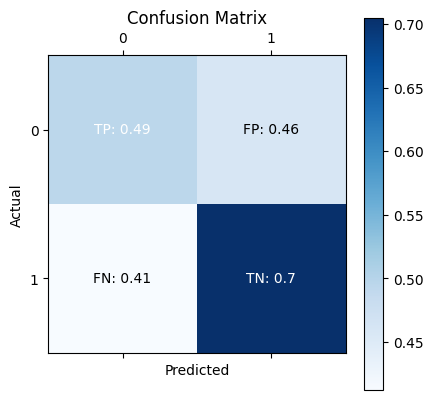

In [30]:
# import pandas as pd
# import matplotlib.pyplot as plt

# TP, FP, FN, TN = 0.54,0.46,0.4122222222222222,0

# class_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
# confusion_matrix = [[TN, FP], [FN, TP]]
# model = 'UFLD-SADL'
# plt.figure(figsize=(6, 6))
# plt.imshow(confusion_matrix, cmap='Blues')
# plt.colorbar()
# plt.xticks(range(len(class_names)), class_names, rotation=45)
# plt.yticks(range(len(class_names)), class_names)
# plt.title(f'Confusion Matrix for Model: {model}')
# plt.tight_layout()
# plt.show()

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
F1 = 0.5628768472906405
Precision = 0.54
Recall = 0.5877777777777777
Accuracy = 0.8395238095238093

FP, FN= 0.46, 0.4122222222222222
TP, TN = 0.49333333333333335, 0.7046666666666668
# print(FP)
# print(FN)
# TP = (FP*Precision)/(1-Precision)
# print(TP)
# TN = (TP-(FP+FN+TP)*Accuracy)/(Accuracy-1)
# TN = np.abs(1 - TP - FP - FN)
# print(TN)
cm = np.array([[TP, FP], [FN, TN]])

# Plot the confusion matrix using matplotlib.pyplot.matshow
plt.matshow(cm, cmap="Blues")

# Add some labels and annotations
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.colorbar()
plt.text(0, 0, f"TP: {round(TP, 2)}", ha="center", va="center", color="white")
plt.text(0, 1, f"FN: {round(FN, 2)}", ha="center", va="center", color="black")
plt.text(1, 0, f"FP: {round(FP, 2)}", ha="center", va="center", color="black")
plt.text(1, 1, f"TN: {round(TN, 2)}", ha="center", va="center", color="white")

# Show the plot
plt.show()

**## TO DO:**


1.   stop logging of each checkpoint or just manage the space correctly ✅
2.   add the test clips folders inside $TUSIMPLEROOT/clips folder ✅
3. update the test.txt to have only data about the available clips similar to how i did with the train_gt.txt file ✅
4. visualize the data as you did in the cascaded lane detection. ✅
5. A way to just take an random test image and see the segmentation as well as the classes just you did in the cascaded CNN lane detection
6. pretrained weights evaluation
7. find metrics for trained weights and biases ✅


**##Solutions worked on:**

1.Use the below code in the ***train.py*** inside the epoch loop to delete previous checkpoints before logging a new one:

ADD THE BELOW CODE AFTER THE `for epoch in range(resume_epoch, cfg.epoch):` LOOP INSIDE THE train.py file


```python
#EXPERIMENTAL CODE STARTS
# Define the path of the folder
folder_path = work_dir

# Get the list of files in the folder
files = os.listdir(folder_path)

# Loop through the files and delete them
for file in files:
    # Join the folder path and the file name
    file_path = os.path.join(folder_path, file)
    # Check if the file is a file (not a folder)
    if os.path.isfile(file_path):
        # Delete the file
        os.remove(file_path)
        # Print a message
        print(f"Deleted {file_path}")
#EXPERIMENTAL CODE ENDS

```



# Filtering training label json files: (NO NEED TO RUN THIS IN THIS PROJECT)

just enter the name of file like **label_data_0313.json**, **label_data_0531.json** or **label_data_0601.json** to get respective filtered files

In [ ]:
# filtering the training json files (OPTIONAL) ------------ONLY RUN IF YOU DON'T HAVE PROPER json files



# Import the json module
import json

clip_names_split = []
# Open the test.txt file and read the clip names
with open("$TUSIMPLEROOT/train_gt.txt") as f:
  clip_names = f.read().splitlines()
  for clp_name in clip_names:
    clip_names_split.extend(clp_name.split())
print(clip_names_split)
# Open the test_label.json file and load the data
with open("/content/drive/MyDrive/TuSimple_sm/train_set/label_data_0313.json") as f:
  data = [json.loads(line) for line in f]
print(len(data))
# Create an empty list to store the filtered data
filtered_data = []

if "clips/0531/1492626371522989086/20.jpg" in clip_names_split:
  print("it is there")
# Loop through the data and check if the clip name matches any of the clip names in the test.txt file
for item in data:
  if item["raw_file"] in clip_names_split:
    # If yes, append the item to the filtered data list
    filtered_data.append(item)
print(filtered_data)
# Open a new file to write the filtered data
with open("/content/drive/MyDrive/TuSimple_sm/train_set/label_data_0313.json", "w") as f:
  # Dump the filtered data list as json
  for obj in filtered_data:
    f.write(json.dumps(obj) + "\n")

#rename the filtered_test_label.json as test_label.json and rename the original test_label.json to other name in order to run below cell

['clips/0601/1494452475553952650/20.jpg', 'clips/0601/1494452475553952650/20.png', '1', '1', '1', '1', 'clips/0601/1494452481550534721/20.jpg', 'clips/0601/1494452481550534721/20.png', '1', '1', '1', '1', 'clips/0601/1494452487547938155/20.jpg', 'clips/0601/1494452487547938155/20.png', '1', '1', '1', '1', 'clips/0601/1494452493544568151/20.jpg', 'clips/0601/1494452493544568151/20.png', '1', '1', '1', '1', 'clips/0601/1494452499541984524/20.jpg', 'clips/0601/1494452499541984524/20.png', '1', '1', '1', '1', 'clips/0601/1494452505539998933/20.jpg', 'clips/0601/1494452505539998933/20.png', '1', '1', '1', '1', 'clips/0601/1494452511536818313/20.jpg', 'clips/0601/1494452511536818313/20.png', '1', '1', '1', '1', 'clips/0601/1494452517534105454/20.jpg', 'clips/0601/1494452517534105454/20.png', '1', '1', '1', '1', 'clips/0601/1494452523531433490/20.jpg', 'clips/0601/1494452523531433490/20.png', '1', '1', '1', '1', 'clips/0601/1494452529530624920/20.jpg', 'clips/0601/1494452529530624920/20.png',